In [ ]:
import math
import io
import os

import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors as nn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

pathname = "/content/drive/My Drive/STAT 312/Laboratory Activity D/"
os.chdir(pathname)

Mounted at /content/drive


In [ ]:
filename = "RuralAtlasData24.xlsx"

In [ ]:
mydata = pd.read_excel(filename, sheet_name="People")
mydata = mydata[mydata['State'] != "PR"]
mydata = mydata[mydata['State'] != "AK"]
mydata = mydata[mydata['State'] != "HI"]

In [ ]:
mydata1 = pd.read_excel(filename, sheet_name="County Classifications")
mydata1 = mydata1[mydata1['State'] != "PR"]
mydata1 = mydata1[mydata1['State'] != "AK"]
mydata1 = mydata1[mydata1['State'] != "HI"]

In [ ]:
mydata1 = mydata1.rename(columns={'FIPStxt': 'FIPS'})

In [ ]:
mydata1

,FIPS,State,County,RuralUrbanContinuumCode2013,UrbanInfluenceCode2013,RuralUrbanContinuumCode2003,UrbanInfluenceCode2003,Metro2013,Nonmetro2013,Micropolitan2013,...,FarmDependent2003,ManufacturingDependent2000,LowEducation2000,RetirementDestination2000,PersistentPoverty2000,Noncore2013,Type_2015_Nonspecialized_NO,Metro_Adjacent2013,PersistentChildPoverty2004,RecreationDependent2000
0,1001,AL,Autauga,2.0,2.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1003,AL,Baldwin,3.0,2.0,4.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1005,AL,Barbour,6.0,6.0,6.0,6.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1007,AL,Bibb,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1009,AL,Blount,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,56037,WY,Sweetwater,5.0,8.0,5.0,8.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,56039,WY,Teton,7.0,8.0,7.0,8.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3146,56041,WY,Uinta,7.0,8.0,7.0,8.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,56043,WY,Washakie,7.0,11.0,7.0,11.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
mydata2 = pd.read_excel(filename, sheet_name="Income")
mydata2 = mydata2[mydata2['State'] != "PR"]
mydata2 = mydata2[mydata2['State'] != "AK"]
mydata2 = mydata2[mydata2['State'] != "HI"]

In [ ]:
mydata2 = mydata2.rename(columns={'FIPStxt': 'FIPS'})

In [ ]:
mydata2

,FIPS,State,County,Median_HH_Inc_ACS,PerCapitaInc,Poverty_Rate_0_17_ACS,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
0,0,US,United States,69021.0,37638.0,17.046705,12.631850,5.777385,7.691715,40661636.0,16.9,12243219.0,69717.0,41393176.0,12.8,12443424.0
1,1000,AL,Alabama,54943.0,30458.0,22.261936,15.785127,7.077316,10.390582,769819.0,22.7,250327.0,53990.0,800848.0,16.3,245896.0
2,1001,AL,Autauga,62660.0,30968.0,18.673864,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
3,1003,AL,Baldwin,64346.0,35384.0,11.299822,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
4,1005,AL,Barbour,36422.0,21325.0,43.744012,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,56037,WY,Sweetwater,76668.0,36233.0,13.501566,10.481391,5.646027,7.358630,4396.0,9.7,990.0,74677.0,3761.0,9.2,1466.0
3197,56039,WY,Teton,94498.0,66296.0,8.315204,7.117040,2.547332,0.652647,1654.0,5.5,223.0,102709.0,1392.0,5.9,344.0
3198,56041,WY,Uinta,75106.0,30586.0,7.466063,7.958751,3.508166,2.071006,1613.0,11.2,635.0,70162.0,1917.0,9.4,429.0
3199,56043,WY,Washakie,62271.0,31032.0,5.125149,6.571842,2.607665,3.694875,499.0,12.5,195.0,62176.0,773.0,10.2,86.0


In [ ]:
mydata3 = pd.read_excel(filename, sheet_name="Jobs")
mydata3 = mydata3[mydata3['State'] != "PR"]
mydata3 = mydata3[mydata3['State'] != "AK"]
mydata3 = mydata3[mydata3['State'] != "HI"]

In [ ]:
new_data = pd.merge(mydata, mydata1, on=['FIPS'])

In [ ]:
new_data1 = pd.merge(mydata3, mydata2, on=['FIPS'])

In [ ]:
new_data2 = pd.merge(new_data, new_data1, on=['FIPS'])

In [ ]:
new_data2

,FIPS,State_x_x,County_x_x,Pop_change_Rate_2020_2021,POPESTIMATE2021,Net_Migration_Rate_2020_2021,Natural_Change_Rate_2020_2021,Net_InterMigrationRate_2020_2021,PopChangeRate1020,PopDensity2020,...,Poverty_Rate_ACS,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS
0,1001,AL,Autauga,0.370263,59095.0,0.424614,-0.054351,0.008492,7.758700,98.922358,...,13.578474,6.250216,8.592895,7847.0,16.1,2199.0,66444.0,6296.0,10.7,2560.0
1,1003,AL,Baldwin,2.639616,239294.0,2.899974,-0.260359,0.027022,27.159356,145.780444,...,9.204905,4.043401,5.503712,20598.0,16.4,8207.0,65658.0,25526.0,10.8,5449.0
2,1005,AL,Barbour,-0.857824,24964.0,-0.381255,-0.476569,0.003971,-8.136359,28.500307,...,26.471910,12.826966,26.729258,5890.0,35.1,1776.0,38649.0,5089.0,23.0,2283.0
3,1007,AL,Bibb,1.142960,22477.0,1.394951,-0.251991,0.009000,-2.714379,35.813799,...,16.942857,9.076190,17.513135,3558.0,29.0,1275.0,48454.0,4204.0,20.6,1281.0
4,1009,AL,Blount,-0.067704,59041.0,0.255581,-0.323285,0.003385,3.161090,91.696163,...,13.236630,5.291223,6.344746,7720.0,16.7,2236.0,56894.0,6992.0,12.0,2337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,WY,Sweetwater,-1.290384,41614.0,-1.482518,0.192134,0.042697,-3.501803,4.054098,...,10.481391,5.646027,7.358630,4396.0,9.7,990.0,74677.0,3761.0,9.2,1466.0
3105,56039,WY,Teton,0.976571,23575.0,0.445453,0.531117,0.034266,9.566075,5.837349,...,7.117040,2.547332,0.652647,1654.0,5.5,223.0,102709.0,1392.0,5.9,344.0
3106,56041,WY,Uinta,0.949073,20635.0,0.655545,0.293528,0.014676,-3.163178,9.823604,...,7.958751,3.508166,2.071006,1613.0,11.2,635.0,70162.0,1917.0,9.4,429.0
3107,56043,WY,Washakie,0.613737,7705.0,1.123009,-0.509271,0.000000,-9.937888,3.432828,...,6.571842,2.607665,3.694875,499.0,12.5,195.0,62176.0,773.0,10.2,86.0


In [ ]:
new_data2 = new_data2.rename(columns={'Hipov_x': 'Hipov'})

In [ ]:
new_data2.columns


Index(['FIPS', 'State_x_x', 'County_x_x', 'Pop_change_Rate_2020_2021',
       'POPESTIMATE2021', 'Net_Migration_Rate_2020_2021',
       'Natural_Change_Rate_2020_2021', 'Net_InterMigrationRate_2020_2021',
       'PopChangeRate1020', 'PopDensity2020',
       ...
       'Poverty_Rate_ACS', 'Deep_Pov_All', 'Deep_Pov_Children',
       'NumAll_inPOV_ACS', 'PCTPOV017', 'POV017', 'MedHHInc', 'POVALL',
       'PCTPOVALL', 'Num_inPOV_0_17_ACS'],
      dtype='object', length=231)

In [ ]:
new_data2 = new_data2.rename(columns={'UrbanInfluenceCode2013_x': 'UrbanInfluenceCode2013'})

In [ ]:
new_data2["UrbanInfluenceCode2013"]

,UrbanInfluenceCode2013
0,2.0
1,2.0
2,6.0
3,1.0
4,1.0
...,...
3104,8.0
3105,8.0
3106,8.0
3107,11.0


In [ ]:
new_data2 = new_data2[(new_data2.Hipov.notnull()) & (new_data2.PopChangeRate1019.notnull()) & (new_data2.UrbanInfluenceCode2013.notnull()) & (new_data2.PerCapitaInc.notnull()) & (new_data2.UnempRate2020.notnull()) & (new_data2.RecreationDependent2000.notnull())]

In [ ]:
new_data2 = new_data2[['PopChangeRate1019','UrbanInfluenceCode2013','PerCapitaInc','UnempRate2020','RecreationDependent2000','Hipov']]

In [ ]:
new_data2

,PopChangeRate1019,UrbanInfluenceCode2013,PerCapitaInc,UnempRate2020,RecreationDependent2000,Hipov
0,2.001,2.0,30968.0,5.4,0.0,0.0
1,21.911,2.0,35384.0,6.2,1.0,0.0
2,-9.664,6.0,21325.0,7.8,0.0,1.0
3,-2.081,1.0,24787.0,7.3,0.0,0.0
4,0.784,1.0,27309.0,4.6,0.0,0.0
...,...,...,...,...,...,...
3104,-2.825,8.0,36233.0,7.3,0.0,0.0
3105,10.180,8.0,66296.0,5.9,1.0,0.0
3106,-4.092,8.0,30586.0,6.3,0.0,0.0
3107,-8.499,11.0,31032.0,5.2,0.0,0.0


In [ ]:
my_x = new_data2[['PopChangeRate1019','UrbanInfluenceCode2013','PerCapitaInc','RecreationDependent2000']]
my_y = new_data2['Hipov']

In [ ]:
my_x_train, my_x_test, my_y_train, my_y_test = train_test_split(my_x, my_y, test_size=1/3, random_state=370)

Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb1 = gnb.fit(my_x_train, my_y_train)

In [ ]:
pred = gnb1.predict(my_x_test)
print("Mislabelled points out of the %d points: %d" % (my_x_test.shape[0], (my_y_test != pred).sum()))

Mislabelled points out of the 1036 points: 138


In [ ]:
print("Accuracy:", round(sum(pred == my_y_test) / len(my_y_test) * 100, 2), "%")

Accuracy: 86.68 %


KNN

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [ ]:
knnMod = nn.KNeighborsClassifier(n_neighbors=6, weights='uniform')
knnMod.fit(my_x_train, my_y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Accuracy on Training Data
exp = knnMod.predict(my_x_train)
obs = my_y_train

print("\n\nAccuracy Training")
print("There were total of",len(exp),"trials, and this model is accurate for",sum(exp==obs),"observations that are in the training set. This has a rate of",sum(exp==obs)/len(exp))



Accuracy Training
There were total of 2072 trials, and this model is accurate for 1869 observations that are in the training set. This has a rate of 0.902027027027027


In [ ]:
accTR = []
accTE = []
kValues = np.arange(1,50)

for k in kValues:
    knnMod = nn.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knnMod.fit(my_x_train, my_y_train)

    exp = knnMod.predict(my_x_train)
    obs = my_y_train
    accTR.append( sum(exp==obs)/len(exp) )

    exp = knnMod.predict(my_x_test)
    obs = my_y_test
    accTE.append( sum(exp==obs)/len(exp) )

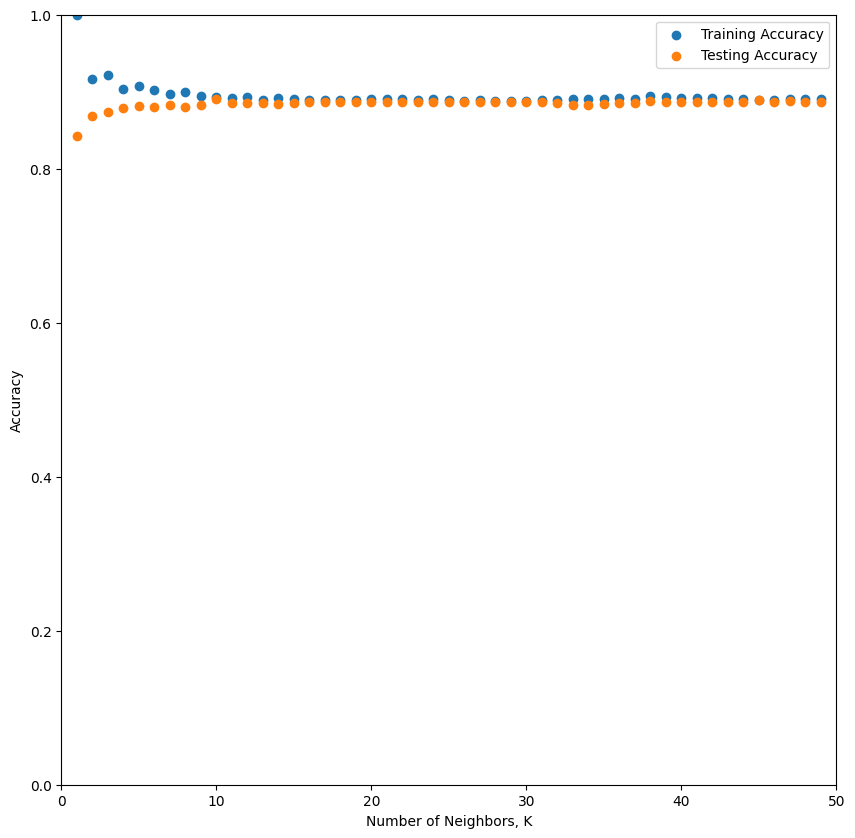

In [ ]:
plt.figure(figsize=(10, 10))

plt.xlim(0,50)
plt.ylim(0,1)

plt.xlabel("Number of Neighbors, K")
plt.ylabel("Accuracy")

plt.scatter(kValues,accTR, label="Training Accuracy")
plt.scatter(kValues,accTE, label="Testing Accuracy")

plt.legend()

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
clf = SVC(kernel='linear')

clf.fit(my_x_train, my_y_train)

SVC(kernel='linear')

In [ ]:
y_predict = clf.predict(my_x_test)

conMat = confusion_matrix(my_y_test, y_predict)
print(conMat,"\n")

accuracy_score(my_y_test,y_predict)

[[826  25]
 [ 91  94]] 



0.888030888030888

In [ ]:
clfp = SVC(kernel='poly', degree =3)
clfp.fit(my_x_train, my_y_train)

SVC(kernel='poly')

In [ ]:
y_predict = clfp.predict(my_x_test)

conMat = confusion_matrix(my_y_test, y_predict)
print(conMat,"\n")

accuracy_score(my_y_test,y_predict)

[[808  43]
 [ 71 114]] 



0.88996138996139

In [ ]:
clfs = SVC(kernel='sigmoid')
clfs.fit(my_x_train, my_y_train)

SVC(kernel='sigmoid')

In [ ]:
y_predict = clfs.predict(my_x_test)

conMat = confusion_matrix(my_y_test, y_predict)
print(conMat,"\n")

accuracy_score(my_y_test,y_predict)

[[663 188]
 [185   0]] 



0.63996138996139

In [ ]:
clfr = SVC(kernel='rbf')
clfr.fit(my_x_train, my_y_train)

SVC()

In [ ]:
clfr.fit(my_x_train, my_y_train)
y_predict = clfr.predict(my_x_test)

conMat = confusion_matrix(my_y_test, y_predict)
print(conMat,"\n")

accuracy_score(my_y_test,y_predict)

[[822  29]
 [ 87  98]] 



0.888030888030888

Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
stTree = tree.DecisionTreeClassifier()
stTree = stTree.fit(my_x_train, my_y_train)

In [ ]:
prediction = stTree.predict(my_x_test)

print("Original Labels \n", my_y_test )
print("\n\nPredicted Labels\n", prediction )

print("\n\nSuccesses:\n", (my_y_test==prediction) )

print("\n\n\nAccuracy:\t", round( np.sum(my_y_test==prediction)/len(my_y_test)*100,1),"%"  )

Original Labels 
 985     1.0
1001    1.0
753     0.0
149     1.0
18      0.0
       ... 
2254    0.0
2539    1.0
738     0.0
931     0.0
843     0.0
Name: Hipov, Length: 1036, dtype: float64


Predicted Labels
 [1. 1. 0. ... 1. 0. 0.]


Successes:
 985      True
1001     True
753      True
149      True
18      False
        ...  
2254     True
2539    False
738     False
931      True
843      True
Name: Hipov, Length: 1036, dtype: bool



Accuracy:	 82.9 %


In [ ]:
stTree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
stTree2 = stTree2.fit(my_x_train, my_y_train)

In [ ]:
prediction = stTree2.predict(my_x_test)

print("Original Labels \n", my_y_test )
print("\n\nLabels Predicted\n", prediction )

print("\n\nSuccesses:\n", (my_y_test==prediction) )

print("\n\n\nAccuracy:\t", round( np.sum(my_y_test==prediction)/len(my_y_test)*100,1),"%"  )

Original Labels 
 985     1.0
1001    1.0
753     0.0
149     1.0
18      0.0
       ... 
2254    0.0
2539    1.0
738     0.0
931     0.0
843     0.0
Name: Hipov, Length: 1036, dtype: float64


Labels Predicted
 [1. 1. 0. ... 0. 0. 0.]


Successes:
 985      True
1001     True
753      True
149      True
18       True
        ...  
2254     True
2539    False
738      True
931      True
843      True
Name: Hipov, Length: 1036, dtype: bool



Accuracy:	 88.3 %


Neural Networks

In [ ]:
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(my_x_train)
X_test = sc.transform(my_x_test)

In [ ]:
classifier = Sequential()

In [ ]:
classifier = Sequential()

# Adjust input_dim to match training data
classifier.add(Dense(units=9, activation='relu', input_dim=4))
classifier.add(Dense(units=9, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(my_x_train, my_y_train, batch_size=10, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7992 - loss: 1218.7037
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7091 - loss: 12.9241
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7353 - loss: 3.7151
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7144 - loss: 7.9953
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7243 - loss: 6.1671
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7159 - loss: 4.7109
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7173 - loss: 5.2509
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7282 - loss: 2.5806
Epoch 9/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7272 - loss: 3.9284
Epoch 10/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7332 - loss: 2.8658


In [ ]:
from sklearn.metrics import accuracy_score
y_predict = classifier.predict(my_x_test)
y_predict = (y_predict > 0.5)
accuracy_score(my_y_test,y_predict)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.8214285714285714

AdaBoost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=100, random_state=370)

abc.fit(my_x_train, my_y_train)
print( abc.estimator_)


print( abc.score(my_x_train, my_y_train) )
print( abc.predict([[1.5, 2.3, 0.0, 0.0]]) )
print( abc.predict_proba([[1.5, 2.3, 0.0, 0.0]]))


DecisionTreeClassifier(max_depth=1)
0.88996138996139
[1.]
[[0.38010769 0.61989231]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
abc2 = AdaBoostClassifier(DecisionTreeClassifier( max_depth=5, random_state=370, criterion='gini'),
    n_estimators=100, random_state=370 )

In [ ]:
abc2.fit(my_x_train, my_y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=370),
                   n_estimators=100, random_state=370)

In [ ]:
print( abc2.score(my_x_train, my_y_train) )
print( abc2.predict([[1.5, 2.3, 0.0, 0.0]] ))
print( abc2.predict_proba([[1.5, 2.3, 0.0, 0.0]]))

0.9816602316602316
[1.]
[[0.36552017 0.63447983]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_predict = abc2.predict(my_x_test)

print("\n")
conMat = confusion_matrix(my_y_test, y_predict)
print(conMat)
print("\n")

print( accuracy_score(my_y_test,y_predict) )



[[799  52]
 [ 71 114]]


0.8812741312741312


In [ ]:
abc3 = AdaBoostClassifier()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=370)

theCVscores = cross_val_score(abc3, my_x, my_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


In [ ]:
accEstimate = np.mean(theCVscores)
accStdev = np.std(theCVscores)
accCI = [accEstimate + 2*accStdev,accEstimate - 2*accStdev]

print("The true estimated accuracy will be %.3f, and has a confidence interval from %.3f to %.3f"
      % (accEstimate, accCI[1], accCI[0]) )

The true estimated accuracy will be 0.887, and has a confidence interval from 0.855 to 0.919


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [87]:
import numpy as np

def predict_county_class():
    global model, scaler, knn_clf, nb_classifier, svm_model, ada_clf

    # Get user input
    pop_change = float(input("Enter Population Change Rate (2010-2020): "))
    unemp_rate = float(input("Enter Unemployment Rate (2020): "))
    recreation_dep = float(input("Enter Recreation Dependency (2000): "))
    per_capita_inc = float(input("Enter per capita income"))


    # Create a feature array
    input_features = np.array([[pop_change, unemp_rate, recreation_dep, per_capita_inc ]])

    # Standardize features using trained scaler (only if scaler is defined)
    if scaler is not None:
        input_features_scaled = scaler.transform(input_features)
    else:
        print("Warning: Scaler is not defined. Using raw input features.")
        input_features_scaled = input_features  # Use raw input if no scaler

    # Make predictions using trained classifiers
    dt_pred = stTree.predict(input_features)[0]
    knn_pred = knnMod.predict(input_features)[0]
    nb_pred = gnb.predict(input_features)[0]
    svm_pred = clf.predict(input_features_scaled)[0]
    abc_pred = abc.predict(input_features)[0]
    nn_pred = int((classifier.predict(input_features_scaled) > 0.5).astype(int)[0])

    # Store predictions
    predictions = {
        "Decision Tree": dt_pred,
        "K-Nearest Neighbors": knn_pred,
        "Naive Bayes": nb_pred,
        "Support Vector Machine": svm_pred,
        "AdaBoost": abc_pred,
        "Neural Network": nn_pred
    }

    # Print predictions neatly
    print("\nPredictions from each classifier:")
    for model_name, pred in predictions.items():
        print(f"{model_name}: {pred}")

    # Majority vote for final prediction
    final_prediction = max(predictions.values(), key=list(predictions.values()).count)
    final_prediction = "High Poverty" if final_prediction == 1 else "Not High Poverty"

    print(f"\nFinal Predicted Class (Majority Vote): {final_prediction}")

# Ensure model and scaler are initialized before calling the function
try:
    scaler
except NameError:
    scaler = None  # Set scaler to None if it wasn't defined

predict_county_class()


Enter Population Change Rate (2010-2020): 4
Enter Unemployment Rate (2020): 5
Enter Recreation Dependency (2000): 1
Enter per capita income25000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Predictions from each classifier:
Decision Tree: 1.0
K-Nearest Neighbors: 1.0
Naive Bayes: 0.0
Support Vector Machine: 1.0
AdaBoost: 1.0
Neural Network: 0

Final Predicted Class (Majority Vote): High Poverty


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
<ipython-input-87-b431e5f67f50>:29: Deprecation